In [1]:
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.environ["OMP_NUM_THREADS"] = "1"

In [3]:
 data= pd.read_excel('Sample_dataset.xlsx')

In [4]:
data

,User ID,Age,Gender,Location,Occupation,Income (INR),Interests,Preferred Channel,Preferred Campaign Type,Optimal Contact Time,Browsing History,Purchase History,Previous Campaign Interactions
0,1,30,F,Mumbai,Engineer,950000,Technology,Email,Discounts,Evening,"tech blogs, shopping sites","electronics,books","opened last email, clicked link"
1,2,24,M,Bengaluru,Designer,700000,Sports,Social Media,Promotions,Morning,"sports news, social media","sports,gear,shoes","liked last post, shared"
2,3,45,F,Delhi,Teacher,600000,Finance,SMS,Information,Afternoon,"news sites, finance blogs","books,office,supplies",replied to last SMS
3,4,32,M,Hyderabad,Doctor,1200000,Health,Email,Information,Evening,"medical journals, health blogs","medical equipment, books","opened last email, clicked link"
4,5,28,F,Pune,Marketing Executive,800000,Fashion,Social Media,Discounts,Morning,"fashion blogs, social media","clothes, accessories","liked last post, shared"
5,6,38,M,Chennai,IT Professional,1100000,Gaming,Email,Promotions,Afternoon,"gaming sites, tech blogs","gaming gear, electronics","opened last email, clicked link"
6,7,50,F,Kolkata,Retired,500000,Travel,SMS,Information,Evening,"travel blogs, news sites","travel packages, books",replied to last SMS
7,8,29,M,Mumbai,Accountant,850000,Finance,Social Media,Promotions,Morning,"finance blogs, social media","books, gadgets","liked last post, shared"
8,9,36,F,Bengaluru,HR Manager,900000,Health,Email,Discounts,Afternoon,"health blogs, shopping sites","health products, books","opened last email, clicked link"
9,10,40,M,Delhi,Lawyer,1300000,Technology,SMS,Information,Evening,"tech blogs, news sites","electronics, books",replied to last SMS


In [5]:
data.head()

,User ID,Age,Gender,Location,Occupation,Income (INR),Interests,Preferred Channel,Preferred Campaign Type,Optimal Contact Time,Browsing History,Purchase History,Previous Campaign Interactions
0,1,30,F,Mumbai,Engineer,950000,Technology,Email,Discounts,Evening,"tech blogs, shopping sites","electronics,books","opened last email, clicked link"
1,2,24,M,Bengaluru,Designer,700000,Sports,Social Media,Promotions,Morning,"sports news, social media","sports,gear,shoes","liked last post, shared"
2,3,45,F,Delhi,Teacher,600000,Finance,SMS,Information,Afternoon,"news sites, finance blogs","books,office,supplies",replied to last SMS
3,4,32,M,Hyderabad,Doctor,1200000,Health,Email,Information,Evening,"medical journals, health blogs","medical equipment, books","opened last email, clicked link"
4,5,28,F,Pune,Marketing Executive,800000,Fashion,Social Media,Discounts,Morning,"fashion blogs, social media","clothes, accessories","liked last post, shared"


In [6]:
data.describe()

,User ID,Age,Income (INR)
count,26.000000,26.000000,2.600000e+01
mean,13.500000,35.500000,8.992308e+05
std,7.648529,7.803845,2.392977e+05
min,1.000000,24.000000,5.000000e+05
25%,7.250000,29.000000,7.425000e+05
50%,13.500000,34.500000,8.950000e+05
75%,19.750000,40.750000,1.095000e+06
max,26.000000,50.000000,1.320000e+06


In [7]:
data.columns = data.columns.str.strip()

In [8]:
# Selecting relevant features
features = ['Age', 'Gender', 'Location', 'Occupation', 'Income (INR)', 'Interests', 
            'Preferred Channel', 'Preferred Campaign Type', 'Browsing History', 'Purchase History']

In [9]:
print(data.columns)

Index(['User ID', 'Age', 'Gender', 'Location', 'Occupation', 'Income (INR)',
       'Interests', 'Preferred Channel', 'Preferred Campaign Type',
       'Optimal Contact Time', 'Browsing History', 'Purchase History',
       'Previous Campaign Interactions'],
      dtype='object')


In [10]:
# Separate the features
X = data[features]

In [11]:
# Define a function to remove outliers using the IQR method
def remove_outliers(df, numeric_columns):
    for col in numeric_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [12]:
# Remove outliers from the numeric columns 'Age' and 'Income (INR)'
X = remove_outliers(X, ['Age', 'Income (INR)'])

In [13]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Age', 'Income (INR)']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Gender', 'Location', 'Occupation', 
                                                         'Interests', 'Preferred Channel', 
                                                         'Preferred Campaign Type', 'Browsing History', 
                                                         'Purchase History'])
    ])

In [14]:
# Preprocess the data
preprocessed_data = preprocessor.fit_transform(X)

# Convert the preprocessed data to a dense array
preprocessed_data_dense = preprocessed_data.toarray()


In [15]:
# Perform PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(preprocessed_data_dense)


In [16]:
# Add PCA results to the DataFrame
data['PCA1'] = X_pca[:, 0]
data['PCA2'] = X_pca[:, 1]


In [17]:
# Determine the optimal number of clusters using the elbow method
inertia = [] #store the measure of clustering quality
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(preprocessed_data_dense)
    inertia.append(kmeans.inertia_)

C:\Users\Aaradhya Agarwal\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Aaradhya Agarwal\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Aaradhya Agarwal\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Aaradhya Agarwal\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans 

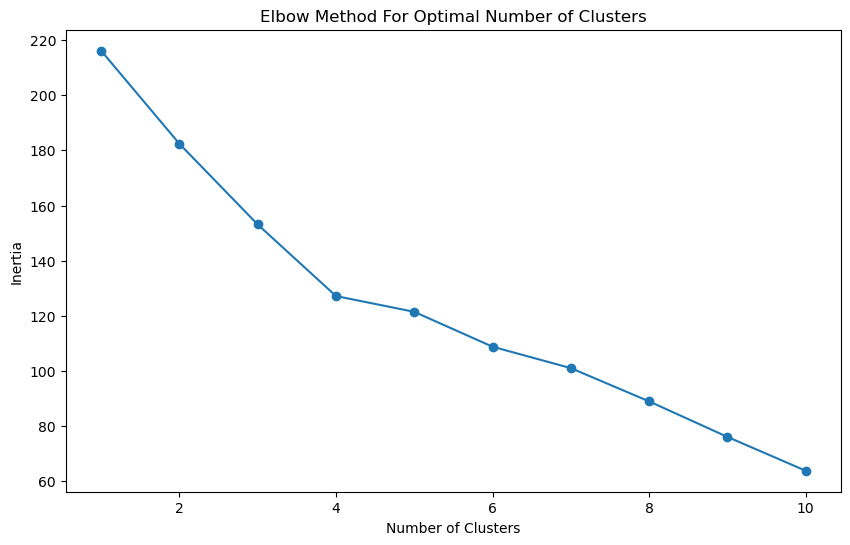

In [18]:

# Plot the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [33]:
# Based on the elbow method, we choose the optimal number of clusters
optimal_clusters = 3

# Apply KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(preprocessed_data_dense)

# Group the data by clusters and summarize characteristics for numeric columns
numeric_columns = ['Age', 'Income (INR)', 'PCA1', 'PCA2']
grouped_data = data.groupby('Cluster')[numeric_columns].mean()

# Print the grouped data summary
print(grouped_data)

           Age  Income (INR)      PCA1      PCA2
Cluster                                         
0        39.50     1191250.0  1.038234 -1.284131
1        38.90      737000.0  0.407168  0.785872
2        27.25      810000.0 -1.547193  0.301791


C:\Users\Aaradhya Agarwal\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


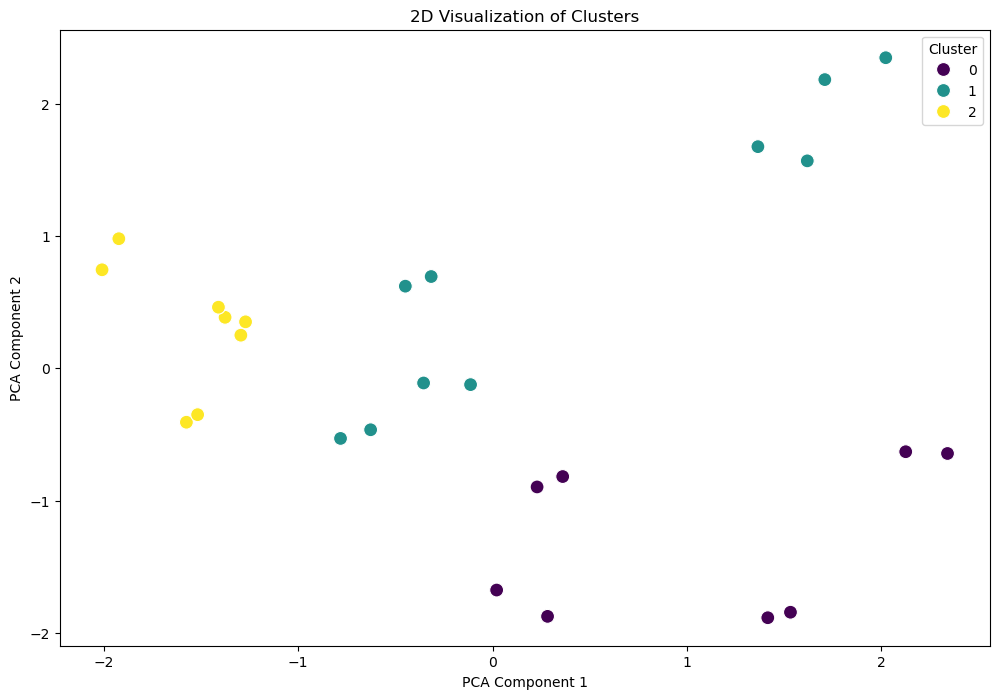

In [34]:

# Plot the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', marker='o', s=100)
plt.title('2D Visualization of Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [35]:
# Get campaign type from user input
campaign_type = input("Enter the campaign type to check: ")


Enter the campaign type to check:  Discounts


In [46]:
target_cluster = 0
target_users = data[data['Cluster'] == target_cluster]


In [47]:
print(target_users.head())

    User ID  Age Gender   Location       Occupation  Income (INR)   Interests  \
3         4   32      M  Hyderabad           Doctor       1200000      Health   
5         6   38      M    Chennai  IT Professional       1100000      Gaming   
9        10   40      M      Delhi           Lawyer       1300000  Technology   
12       13   48      F    Chennai       Consultant       1150000     Finance   
16       17   33      F      Delhi           Doctor       1250000      Health   

   Preferred Channel Preferred Campaign Type Optimal Contact Time  \
3              Email             Information              Evening   
5              Email              Promotions            Afternoon   
9                SMS             Information              Evening   
12               SMS             Information              Evening   
16             Email             Information              Evening   

                  Browsing History           Purchase History  \
3   medical journals, health blog

In [48]:
# Define a function to check if a campaign should be forwarded to the target audience
def should_forward_campaign(campaign_type, target_users):
    # Get the distribution of preferred campaign types in the target cluster
    preferred_campaigns = target_users['Preferred Campaign Type'].value_counts()
    
    # Create a detailed message based on the presence of the campaign type
    if campaign_type in preferred_campaigns.index:
        message = (f"The campaign '{campaign_type}' should be forwarded to users in cluster {target_cluster}.\n"
                   f"Cluster {target_cluster} includes {len(target_users)} users with the following preferences:\n"
                   f"{preferred_campaigns.to_string()}")
    else:
        message = (f"The campaign '{campaign_type}' should NOT be forwarded to users in cluster {target_cluster}.\n"
                   f"Cluster {target_cluster} includes {len(target_users)} users with the following preferences:\n"
                   f"{preferred_campaigns.to_string()}")
    return message


In [49]:
# Get recommendation
recommendation = should_forward_campaign(campaign_type, target_users)
print(recommendation)

The campaign 'Discounts' should NOT be forwarded to users in cluster 0.
Cluster 0 includes 8 users with the following preferences:
Preferred Campaign Type
Information    6
Promotions     2


C:\Users\Aaradhya Agarwal\AppData\Local\Temp\ipykernel_17496\2141824056.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_users['Preferred Campaign Type'].value_counts().index,


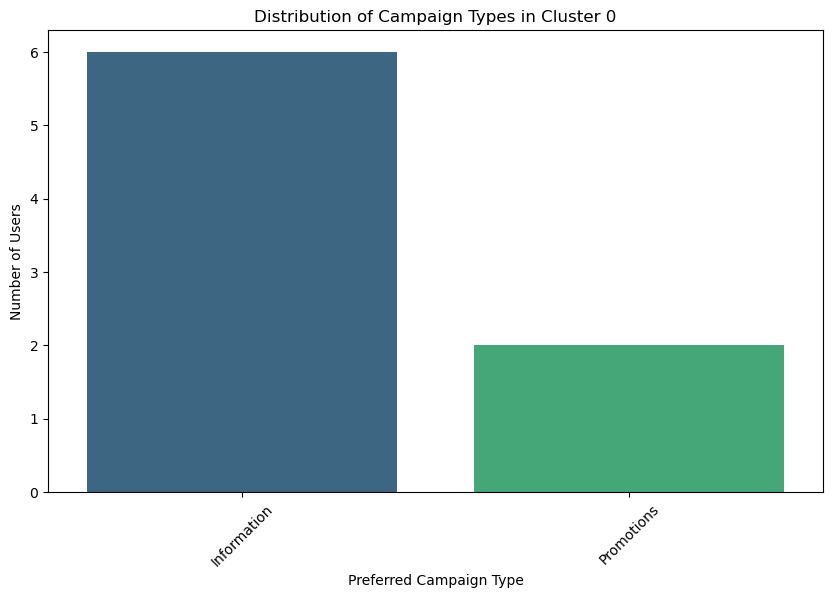

In [50]:
# Plot distribution of campaign types in the target cluster
plt.figure(figsize=(10, 6))
sns.barplot(x=target_users['Preferred Campaign Type'].value_counts().index,
            y=target_users['Preferred Campaign Type'].value_counts().values,
            palette='viridis')
plt.title(f'Distribution of Campaign Types in Cluster {target_cluster}')
plt.xlabel('Preferred Campaign Type')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()